In [9]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pymc3 as pm

%matplotlib inline

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
c:\program files\python36\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
c:\program files\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv 

# Chapter 03

## Easy

In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


class Distribution:
    def __init__(self, prior=None):
        self.posterior = None
        if prior is None:
            self.grid_size = 20
            self.prior = self._standardize(np.ones(self.grid_size))
        else:
            self.grid_size = len(prior)
            self.prior = self._standardize(prior)
        self.grid = np.linspace(0,1, self.grid_size)
        self.tries = 0
        self.successes = 0
        
    def _standardize(self, dist):
        return dist / dist.sum()
        
    def update(self, successes, tries):
        likelihood = stats.binom.pmf(successes, tries, self.grid)
        if self.posterior is not None:
            self.prior = self.posterior
        self.posterior = self._standardize(self.prior * likelihood)
        self.tries = tries
        self.successes = successes
    
    def plot(self):
        fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, sharey=True)
        ax1.plot(self.grid, self.prior, label='prior')
        ax1.set_title("Prior")
        if self.posterior is not None:
            ax2.plot(self.grid, self.posterior, label='posterior')
            ax2.set_title('Posterior ({:d} tries, {:d} successes)'.format(self.tries, self.successes))
        for x in (ax1, ax2):
            x.set_xlabel('true value of p')
            x.set_ylabel('posterior probability')
            x.legend()

In [9]:
d = Distribution(prior=np.ones(1000))
d.update(6,9)
np.random.seed(100)
samples = np.random.choice(d.grid, size=int(1e4), p=d.posterior, replace=True)

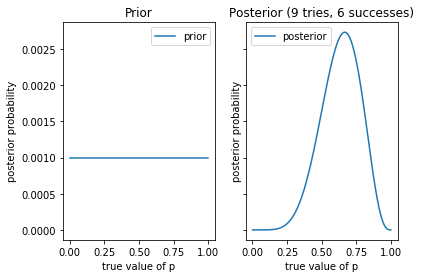

In [10]:
d.plot()

## 3E1

In [13]:
samples[samples < 0.2].size / samples.size

0.001

## 3E2

In [16]:
samples[samples > 0.8].size / samples.size

0.1209

## 3E3

In [19]:
samples[(samples < 0.8) & (samples > 0.2)].size / samples.size

0.8781

## 3E4

In [25]:
np.percentile(samples, 20)

0.51551551551551555

## 3E5

In [26]:
np.percentile(samples, 80)

0.75975975975975973

## 3E6

In [34]:
pm.hpd(samples, alpha=0.34)

array([ 0.51651652,  0.78878879])

## 3E7

In [36]:
np.percentile(samples, [17, 83])

array([ 0.4984985 ,  0.77294294])

## Medium

## 3M1

In [4]:
d = Distribution(prior=np.ones(1000))
d.update(8,15)
np.random.seed(100)
medium_samples = np.random.choice(d.grid, size=int(1e4), p=d.posterior, replace=True)

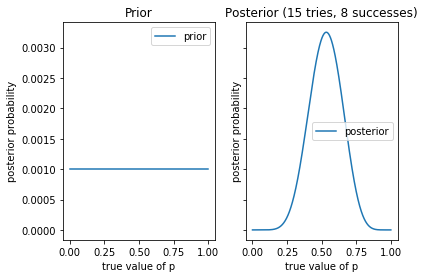

In [5]:
d.plot()

## 3M2

In [12]:
pm.hpd(medium_samples, alpha=0.1)

array([0.33733734, 0.72572573])